In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [8]:
#The make_moons() function is used in binary classification and generates a swirl pattern that looks like two moons
X, y = make_moons(n_samples=500, noise=0.1)
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
1,0.979214,-0.517721
0,0.749683,0.109501
1,0.772202,-0.338961
0,0.319804,0.972480
0,-1.146033,0.185695


Text(0, 0.5, 'X2')

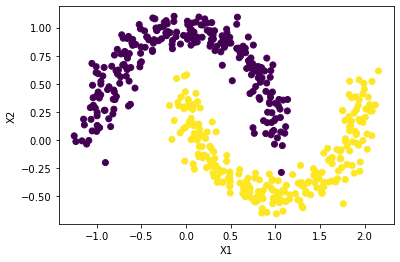

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("X1")
plt.ylabel("X2")

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


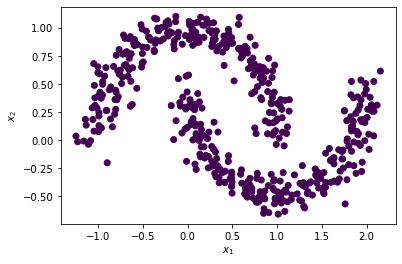

In [23]:
#Applying Sklearn DBSCAN Clustering with default parameters eps = 0.5 and min_samples = 5
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)
#our algorithm is unable to find distinct clusters and hence a single cluster with zero noise points is returned.
# Visualizing DBSCAN
#Attribute labels_: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.
plt.xlabel("$x_1$")
plt.scatter(X[:, 0], X[:, 1], c=dbscan_cluster1.labels_, label=y) 
plt.ylabel("$x_2$")
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 13
Estimated no. of noise points: 94
v_measure = 0.3693915292423156


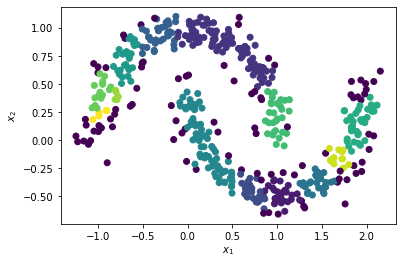

In [24]:
#Applying DBSCAN with eps = 0.1 and min_samples = 8
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)
#it can be seen that this time algorithm produces way too many clusters and noises
# Visualizing DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=dbscan_cluster.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
#set() creates a set object. The items in a set list are unordered, so it will appear in random order.
N_clus=len(set(labels))-(1 if -1 in labels else 0) 
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
#The list() function creates a list object. A list object is a collection which is ordered and changeable.
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Text(0, 0.5, 'Distance')

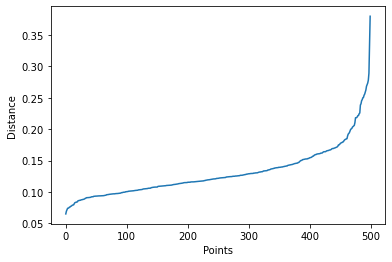

In [31]:
#Finding the Optimal value of Epsilon
'''
In this approach, the average distance between each point and its k nearest neighbors is calculated where k = the MinPts 
selected by us. We then plot the average k-distances in ascending order on a k-distance graph
The optimal value for epsilon is the point with maximum curvature or bend, i.e. at the greatest slope.
'''
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)
distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.16700137914736302


<Figure size 360x360 with 0 Axes>

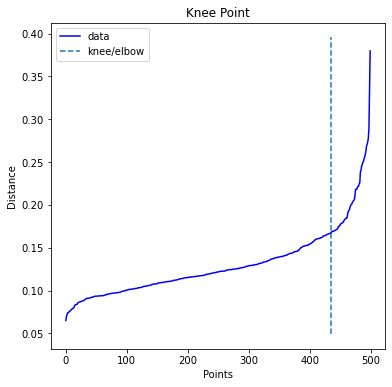

In [33]:
#Identifying Elbow Point with Kneed Package 
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Estimated no. of clusters: 2
Estimated no. of noise points: 5
v_measure = 0.93829092934693


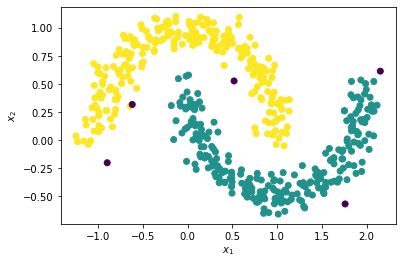

In [35]:
#Applying DBSCAN with Optimal value of Epsilon = 0.163
dbscan_cluster = DBSCAN(eps=0.163, min_samples=8)
dbscan_cluster.fit(X)
#This time it is quite evident that the DBSCAN clustering is done properly with two resulting clusters and only 5 noise points.
# Visualizing DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=dbscan_cluster.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))